# 1.9 Complaint Inspections

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import math

In [2]:
from research.strings import VIOLATIONS, MONTHS

In [3]:
df_canvass = pd.read_csv("data/canvass_records.csv.gz")
df_complaint = pd.read_csv("data/complaint_records.csv.gz")
df_canvass["aka_name"] = df_canvass["aka_name"].fillna("NULL_NAME")
df_complaint["aka_name"] = df_complaint["aka_name"].fillna("NULL_NAME")
df_canvass["critical_found"] = df_canvass[VIOLATIONS].max(axis=1)
df_complaint["critical_found"] = df_complaint[VIOLATIONS].max(axis=1)
print("Read {} canvass records.".format(len(df_canvass)))
print("Read {} complaint records.".format(len(df_complaint)))

Read 50462 canvass records.
Read 17088 complaint records.


## Summary

In [4]:
df_canvass.groupby("aka_name")["inspection_id"].count().sort_values(ascending=False).head(10)

aka_name
SUBWAY                     1700
DUNKIN DONUTS               552
NULL_NAME                   198
POTBELLY SANDWICH WORKS     168
STARBUCKS COFFEE            154
CHIPOTLE MEXICAN GRILL      141
CORNER BAKERY CAFE          141
JIMMY JOHN'S                122
Subway                      120
SUBWAY SANDWICHES           116
Name: inspection_id, dtype: int64

## Canvass vs Complaint by Restaurant Name

In [5]:
def show_restaurant(restaurant):
    rest_name = restaurant.lower()
    print("Searching for '%{}%'...".format(rest_name))
    rest_can = df_canvass[df_canvass["aka_name"].str.contains(rest_name, case=False)]
    rest_com = df_complaint[df_complaint["aka_name"].str.contains(rest_name, case=False)]
    print("Found {} canvass inspections.".format(len(rest_can)))
    print("Found {} complaint inspections.".format(len(rest_com)))
    bef_can = rest_can.query("year < 2015")
    aft_can = rest_can.query("year >= 2015")
    bef_com = rest_com.query("year < 2015")
    aft_com = rest_com.query("year >= 2015")
    print("Before: {} canvass inspections.".format(len(bef_can)))
    print("After: {} canvass inspections.".format(len(aft_can)))
    print("Before: {} complaint inspections.".format(len(bef_com)))
    print("After: {} complaint inspections.".format(len(aft_com)))
    ser_bef_can = bef_can.groupby("month")["critical_found"].mean()
    ser_aft_can = aft_can.groupby("month")["critical_found"].mean()
    ser_bef_com = bef_com.groupby("month")["critical_found"].mean()
    ser_aft_com = aft_com.groupby("month")["critical_found"].mean()
    pal = sns.color_palette("hls", 2)
    plt.plot(ser_bef_can.index, ser_bef_can.values, color=pal[0], label="Canvass (Before)", marker="o")
    plt.plot(ser_aft_can.index, ser_aft_can.values, color=pal[0], label="Canvass (After)", marker="o", linestyle="--")
    plt.plot(ser_bef_com.index, ser_bef_com.values, color=pal[1], label="Complaint (Before)", marker="^")
    plt.plot(ser_aft_com.index, ser_aft_com.values, color=pal[1], label="Complaint (After)", marker="^", linestyle="--")
    plt.xticks(range(1, len(MONTHS) + 1), MONTHS)
    plt.xlabel("Month")
    plt.ylabel("Monthly Critical Violation Hit Rate")
    plt.title("Monthly Hit Rates for Canvass and Complaint Inspections, Before and After Model")
    plt.grid()
    plt.legend()
    plt.gcf().set_size_inches(12, 6)
    plt.show()

Searching for '%subway%'...
Found 2154 canvass inspections.
Found 535 complaint inspections.
Before: 1132 canvass inspections.
After: 1022 canvass inspections.
Before: 329 complaint inspections.
After: 206 complaint inspections.


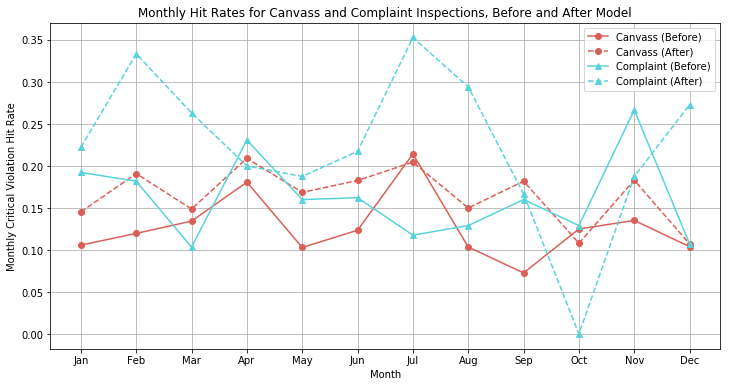

In [6]:
show_restaurant("subway")

Searching for '%potbelly%'...
Found 386 canvass inspections.
Found 64 complaint inspections.
Before: 191 canvass inspections.
After: 195 canvass inspections.
Before: 26 complaint inspections.
After: 38 complaint inspections.


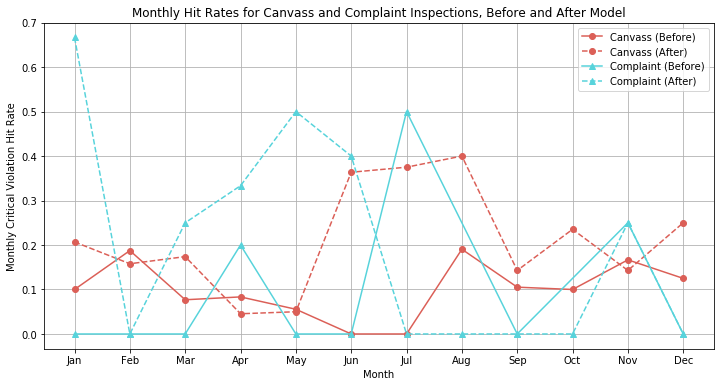

In [7]:
show_restaurant("potbelly")

Searching for '%dunkin donuts%'...
Found 925 canvass inspections.
Found 565 complaint inspections.
Before: 524 canvass inspections.
After: 401 canvass inspections.
Before: 332 complaint inspections.
After: 233 complaint inspections.


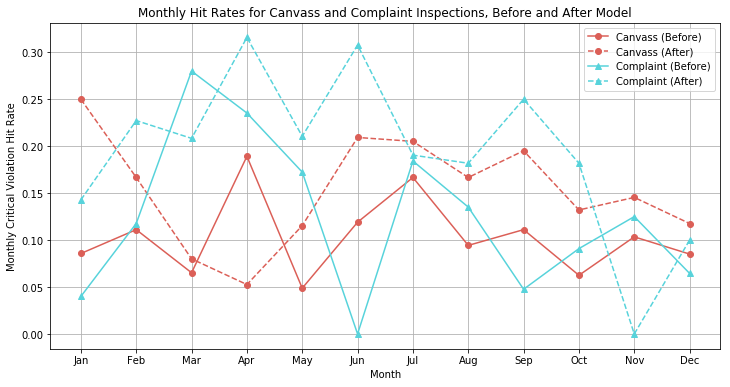

In [8]:
show_restaurant("dunkin donuts")

Searching for '%baskin robbins%'...
Found 295 canvass inspections.
Found 195 complaint inspections.
Before: 173 canvass inspections.
After: 122 canvass inspections.
Before: 119 complaint inspections.
After: 76 complaint inspections.


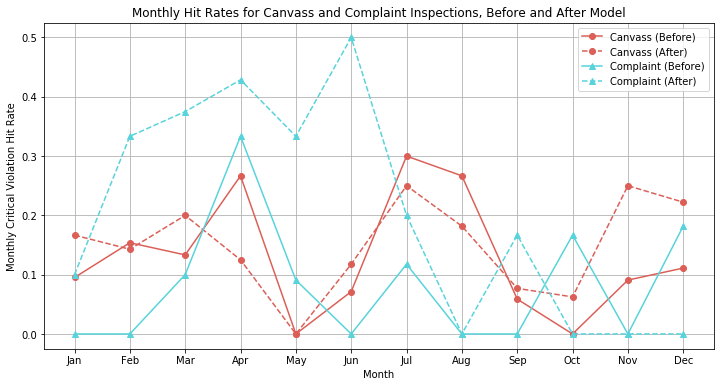

In [9]:
show_restaurant("baskin robbins")

Searching for '%chipotle%'...
Found 215 canvass inspections.
Found 145 complaint inspections.
Before: 103 canvass inspections.
After: 112 canvass inspections.
Before: 65 complaint inspections.
After: 80 complaint inspections.


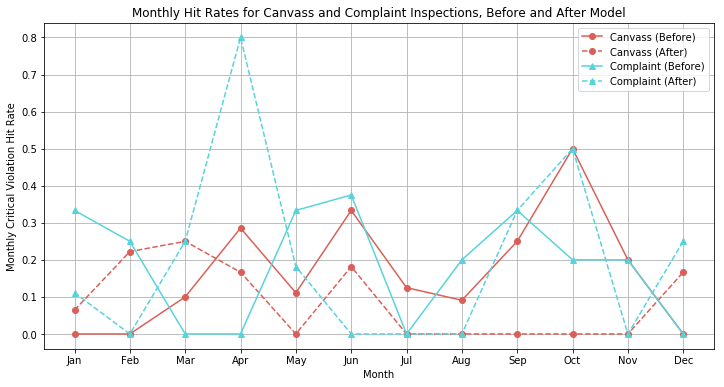

In [10]:
show_restaurant("chipotle")

## Interactive Search

In [11]:
from ipywidgets import interact
import ipywidgets as widgets

In [12]:
df_canvass.groupby("aka_name")["inspection_id"].count().sort_values(ascending=False).head(10)

aka_name
SUBWAY                     1700
DUNKIN DONUTS               552
NULL_NAME                   198
POTBELLY SANDWICH WORKS     168
STARBUCKS COFFEE            154
CHIPOTLE MEXICAN GRILL      141
CORNER BAKERY CAFE          141
JIMMY JOHN'S                122
Subway                      120
SUBWAY SANDWICHES           116
Name: inspection_id, dtype: int64

In [13]:
interact(show_restaurant, restaurant="subway")

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.show_restaurant(restaurant)>